### **Kelompok 4**

*   Bintang Anugrah Alam 2006571173

*   Cindy Fara Nabila 2006463774

*   Muhammad Fabian Alkautsar 2006482653
*   Naufal Fachri Muhammad 2006533710

*   Salsabilla 2006463856
*   Salsana Siti Hatmanti 2006571154




In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr, chi2
from sklearn.covariance import MinCovDet
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from plotly.offline import plot, iplot
import plotly.graph_objs as go
import plotly.express as px
mydata = pd.read_csv('https://raw.githubusercontent.com/Salsabillaa01/Case-Study-02---Kelompok-4---Kelas-A/main/data%20study%20case%202.csv')
mydata.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8


In [ ]:
print(mydata.isnull().sum())

ID                       0
Jenis Kelamin            4
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 12
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64


In [ ]:
print("Unique data untuk Jenis Kelamin :")
print(mydata['Jenis Kelamin'].unique())
print("Unique data untuk Promo :")
print(mydata['Promo'].unique())
print("Unique data untuk Menikah :")
print(mydata['Menikah'].unique())
print("Unique data untuk Umur:")
print(mydata['Umur'].unique())
print("Unique data untuk Kota :")
print(mydata['Kota'].unique())
print("Unique data untuk Hari Favorit:")
print(mydata['HariFav'].unique())
print("Unique data untuk Rasa Favorit :")
print(mydata['FavFlavor'].unique())

Unique data untuk Jenis Kelamin :
['Wanita' 'Pria' nan '-']
Unique data untuk Promo :
[ 1.  2.  0. nan  3.  5.]
Unique data untuk Menikah :
['1' '0' nan ' ' '-']
Unique data untuk Umur:
['49' '32' '51' '19' '38' '33' '27' '24' '21' '31' '36' '46' '60' '58'
 '47' '45' '22' '18' '59' '44' '39' '35' '20' '30' '23' '48' '37' '40'
 '34' '41' '53' '54' '28' '55' '25' '50' '42' '29' '43' '52' '2' "35'"
 '56' '26' '57']
Unique data untuk Kota :
['Jakarta' 'Depok' 'Tangerang' 'JJakarta']
Unique data untuk Hari Favorit:
['Sabtu' 'Minggu' 'Rabu' 'Senin' 'Selasa' 'Jumat' 'Kamis']
Unique data untuk Rasa Favorit :
[2 6 3 7 8 0 5 4 1 9]


In [ ]:
data_copy = mydata.copy()
data_copy.drop(185, axis = 0, inplace = True)
data_copy.drop([151,180], axis = 0, inplace = True)
data_copy.loc[:,'Umur'] = data_copy.loc[:,'Umur'].replace("35'","35")
data_copy.loc[:,'Kota'] = data_copy.loc[:,'Kota'].replace("JJakarta","Jakarta")
data_copy.loc[:,'FavFlavor'] = data_copy.loc[:,'FavFlavor'].replace(9,8)
data_copy.loc[:,'Promo'] = data_copy.loc[:,'Promo'].replace(5.,3.)

In [ ]:
print("Unique data untuk Jenis Kelamin :")
print(data_copy['Jenis Kelamin'].unique())
print("Unique data untuk Promo :")
print(data_copy['Promo'].unique())
print("Unique data untuk Menikah :")
print(data_copy['Menikah'].unique())
print("Unique data untuk Umur:")
print(data_copy['Umur'].unique())
print("Unique data untuk Kota :")
print(data_copy['Kota'].unique())
print("Unique data untuk Hari Favorit:")
print(data_copy['HariFav'].unique())
print("Unique data untuk Rasa Favorit :")
print(data_copy['FavFlavor'].unique())

Unique data untuk Jenis Kelamin :
['Wanita' 'Pria' nan]
Unique data untuk Promo :
[ 1.  2.  0. nan  3.]
Unique data untuk Menikah :
['1' '0' nan]
Unique data untuk Umur:
['49' '32' '51' '19' '38' '33' '27' '24' '21' '31' '36' '46' '60' '58'
 '47' '45' '22' '18' '59' '44' '39' '35' '20' '30' '23' '48' '37' '40'
 '34' '41' '53' '54' '28' '55' '25' '50' '42' '29' '43' '52' '2' '56' '26'
 '57']
Unique data untuk Kota :
['Jakarta' 'Depok' 'Tangerang']
Unique data untuk Hari Favorit:
['Sabtu' 'Minggu' 'Rabu' 'Senin' 'Selasa' 'Jumat' 'Kamis']
Unique data untuk Rasa Favorit :
[2 6 3 7 8 0 5 4 1]


In [ ]:
data_copy.dropna(inplace = True)

In [ ]:
print(data_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    176 non-null    int64  
 1   Jenis Kelamin         176 non-null    object 
 2   Umur                  176 non-null    object 
 3   Pendapatan-per-bulan  176 non-null    object 
 4   skor-pengeluaran      176 non-null    int64  
 5   Menikah               176 non-null    object 
 6   Kota                  176 non-null    object 
 7   Promo                 176 non-null    float64
 8   HariFav               176 non-null    object 
 9   FavFlavor             176 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.1+ KB
None


In [ ]:
display(data_copy.head())

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8


In [ ]:
data_copy.loc[:,"Pendapatan-per-bulan"] = data_copy.loc[:,"Pendapatan-per-bulan"].str.replace(',','')
data_copy.loc[:,"Pendapatan-per-bulan"] = data_copy.loc[:,"Pendapatan-per-bulan"].str.replace('Rp','')

In [ ]:
display(data_copy.head())

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [ ]:
print(data_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    176 non-null    int64  
 1   Jenis Kelamin         176 non-null    object 
 2   Umur                  176 non-null    object 
 3   Pendapatan-per-bulan  176 non-null    object 
 4   skor-pengeluaran      176 non-null    int64  
 5   Menikah               176 non-null    object 
 6   Kota                  176 non-null    object 
 7   Promo                 176 non-null    float64
 8   HariFav               176 non-null    object 
 9   FavFlavor             176 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.1+ KB
None


In [ ]:
data_copy.loc[:,"Jenis Kelamin"] = data_copy.loc[:,"Jenis Kelamin"].astype('category')
data_copy.loc[:,"Umur"] = data_copy.loc[:,"Umur"].astype('int64')
data_copy.loc[:,"Pendapatan-per-bulan"] = data_copy.loc[:,"Pendapatan-per-bulan"].astype('int64')
data_copy.loc[:,"Menikah"] = data_copy.loc[:,"Menikah"].astype('category')
data_copy.loc[:,"Kota"] = data_copy.loc[:,"Kota"].astype('category')
data_copy.loc[:,"Promo"] = data_copy.loc[:,"Promo"].astype('category')
data_copy.loc[:,"HariFav"] = data_copy.loc[:,"HariFav"].astype('category')
data_copy.loc[:,"FavFlavor"] = data_copy.loc[:,"FavFlavor"].astype('category')

In [ ]:
print(data_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    176 non-null    int64   
 1   Jenis Kelamin         176 non-null    category
 2   Umur                  176 non-null    int64   
 3   Pendapatan-per-bulan  176 non-null    int64   
 4   skor-pengeluaran      176 non-null    int64   
 5   Menikah               176 non-null    category
 6   Kota                  176 non-null    category
 7   Promo                 176 non-null    category
 8   HariFav               176 non-null    category
 9   FavFlavor             176 non-null    category
dtypes: category(6), int64(4)
memory usage: 9.2 KB
None


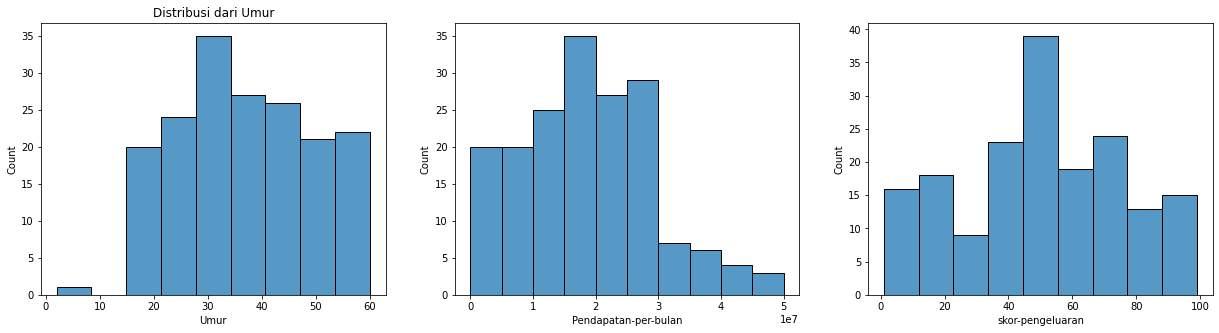

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (21,5))
sns.histplot(x = 'Umur', data = data_copy, ax = ax[0])
ax[0].set_title('Distribusi dari Umur')
sns.histplot(x = 'Pendapatan-per-bulan', data = data_copy, ax = ax[1])
sns.histplot(x = 'skor-pengeluaran', data = data_copy, ax = ax[2])
plt.show()

KOMENTAR: Untuk apa melihat distribusi ini? Info apa yang dapat diperoleh?

In [ ]:
def remove_outlier_multivariate(data):
    """Fungsi ini akan mengeluarkan data yang telah dikeluarkan outliernya dan data outliernya"""
    x_values = data[['Umur','Pendapatan-per-bulan','skor-pengeluaran']].values
    mcd = MinCovDet()
    mcd.fit(x_values)
    loc_ = mcd.location_
    cov_ = mcd.covariance_
    mahal_robust_dist = mcd.mahalanobis(x_values)
    cutoff = chi2.ppf(0.95, x_values.shape[1])
    data_new = data[mahal_robust_dist <= cutoff]
    data_outliers = data[mahal_robust_dist > cutoff]
    return data_new, data_outliers

Menggunakan Mahalanobis distance untuk mendeteksi outlier, tetapi terdapat pengaturan pada estimasi mu dan covariance dengan menggunakan MinCovDet yang dimana lebih robust terhadap outlier sehingga nilai mu dan sigma tidak terpengaruhi oleh outliers. Namun, seiring berjalannya waktu terdapat banyak pengaturan terhadap Mahalanobis distance ini, salah satunya adalah rujukan yang terdapat dalam paper berikut ini. Berikut adalaah paper yang menjelaskan menganai Mahalanbosi distance dengan beberapa adjustment (pengaturan) : https://www.scirp.org/journal/paperinformation.aspx?paperid=90172

In [ ]:
data_no_outlier , outliers = remove_outlier_multivariate(data_copy)

In [ ]:
print("Ukuran data sebelum pengeluaran outlier :")
print(data_copy.shape)
print("Ukuran data setelah pengeluaran outlier :")
print(data_no_outlier.shape)

Ukuran data sebelum pengeluaran outlier :
(176, 10)
Ukuran data setelah pengeluaran outlier :
(124, 10)


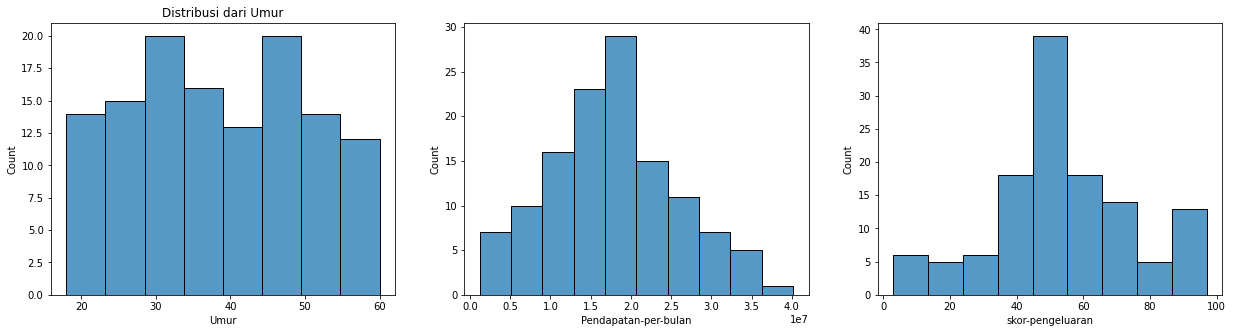

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (21,5))
sns.histplot(x = 'Umur', data = data_no_outlier, ax = ax[0])
ax[0].set_title('Distribusi dari Umur')
sns.histplot(x = 'Pendapatan-per-bulan', data = data_no_outlier, ax = ax[1])
sns.histplot(x = 'skor-pengeluaran', data = data_no_outlier, ax = ax[2])
plt.show()

In [ ]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

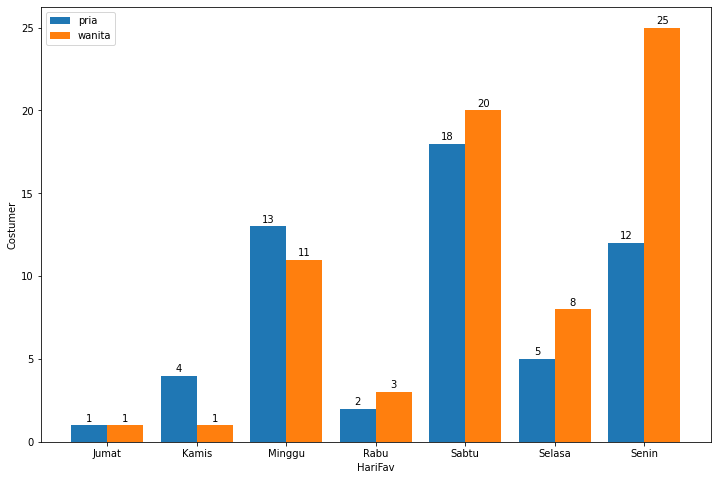

In [ ]:
counts = data_no_outlier.groupby(["HariFav", "Jenis Kelamin"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.xlabel('HariFav')
plt.ylabel('Costumer')
plt.legend(["pria", "wanita"])
plt.show()

Dari barplot, terlihat bahwa pelanggan cenderung banyak yang datang dan menggunakan kartu loyality programnya pada hari Senin, Sabtu, dan Minggu, untuk kedepannya mungkin perusahaan sebaiknya menambah jumlah pegawai pada hari-hari tersebut agar bisa melayani pelanggan dengan lebih efektif dan baik. Selain itu, perusahaan juga bisa membuat promo spesial atau penawaran khusus, pada hari yang jumlah pelanggan nya cenderung dikit seperti hari Selasa, Rabu, Kamis, dan Jumat agar lebih banyak pelanggan yang akan datang dan perusahaan bisa mendapat keuntungan yang lebih banyak.

Dari barplot juga terlihat bahwa jenis kelamin tidak terlalu berpengaruh terhadap hari penggunaan kartu loyality program. Dan juga terlihat pada barplot, pada hari Senin, pelanggan wanita cenderung lebih banyak menggunakan kartu loyality programnya, untuk kedepannya mungkin perusahaan dapat memberikan benefit khusus bagi customer wanita yang menggunakan kartu loyality program pada hari Senin. 

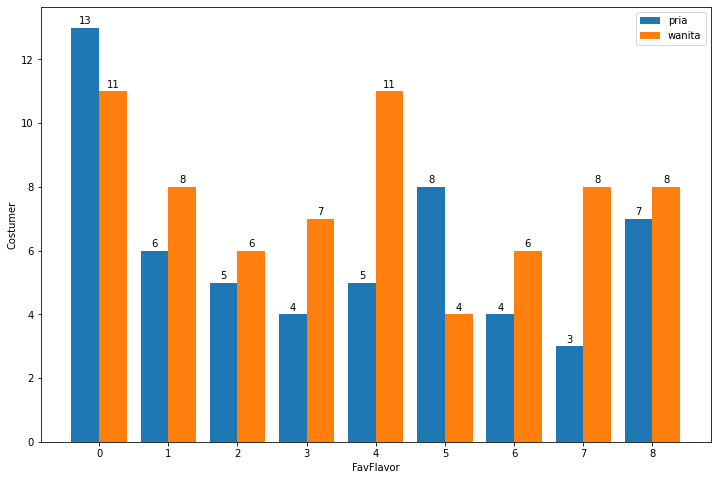

In [ ]:
counts2 = data_no_outlier.groupby(["FavFlavor", "Jenis Kelamin"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts2)
plt.xlabel('FavFlavor')
plt.ylabel('Costumer')
plt.legend(["pria", "wanita"])
plt.show()

Untuk keterangan FavFlavor:

0: Vanilla

1: Strawberry

3: Cokelat

4: Blueberry

5: Bubblegum

6: Coconut

7: Caramel Pecan

8: Mix Flavors

Berdasarkan hasil visualisasi, terlihat bahwa rasa yang menjadi favorit orang-orang adalah Vanilla dengan jumlah orang yang memilih sebanyak 24 orang. Namun, jika dilihat dari masing-masing jenis kelamin, untuk Pria mayoritas memilih rasa Vanilla sebagai rasa favorit dan untuk wanita mayoritas juga memilih rasa vanilla sebagai rasa favoritnya. Kedepannya, perusahaan dapat memproduksi es krim rasa vanilla dengan jumlah yang lebih banyak dibanding dengan rasa lain menimbang dari jumlah orang yang memilih vanilla sebagai rasa favoritnya. Selain itu, perusahaan dapat memproduksi rasa coconut dengan jumlah yang lebih sedikit menimbang dari orang yang memilih rasa coconut sebagai rasa favoritnya.

KOMENTAR: Atau bisa juga mmeberikan promo khusus untuk rasa coconut; atau "bundling" vanila dengan coklat?

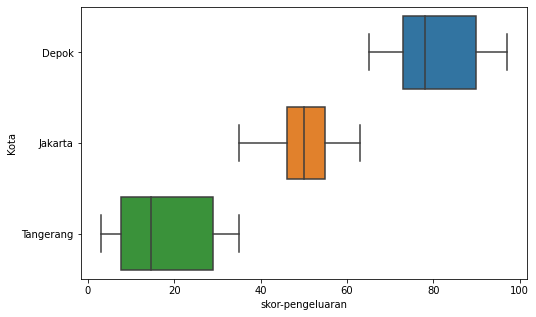

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = 'skor-pengeluaran',y = 'Kota', data = data_no_outlier)
plt.show()

KOMENTAR: Info apa yang bisa diperoleh dari output ini?

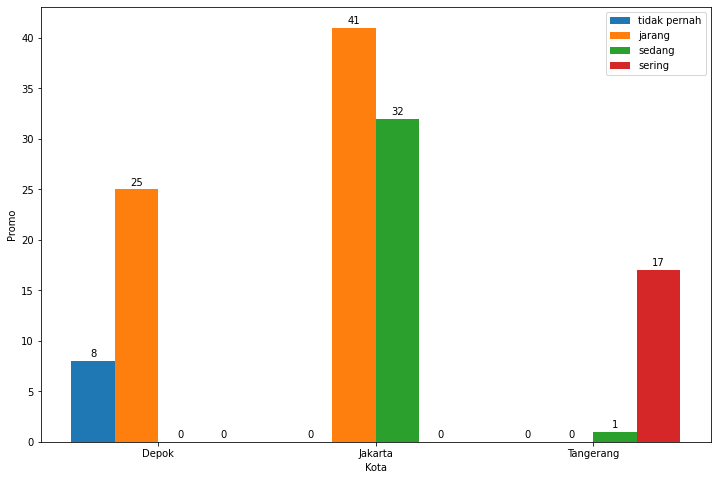

In [ ]:
counts = data_no_outlier.groupby(["Kota", "Promo"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.xlabel('Kota')
plt.ylabel('Promo')
plt.legend(["tidak pernah", "jarang", 'sedang', 'sering'])
plt.show()

Interpretasi = terlihat bahwa Jakarta adalah kota terbanyak menggunakan promo dibanding Depok dan Tangerang. terlihat juga bahwa Tangerang adalah kota yang paling sedikit menggunakan promo dibanding Depok dan Jakarta. 

Rekomendasi = Dikarenakan besar gaji berhubungan dengan skor pengeluaran, dan berdasarkan hasil visualisasi hubungan antara kota dengan promo. Maka, dapat disarankan untuk lebih banyak memberikan promo di kota tangerang yang memiliki gaji sedikit.

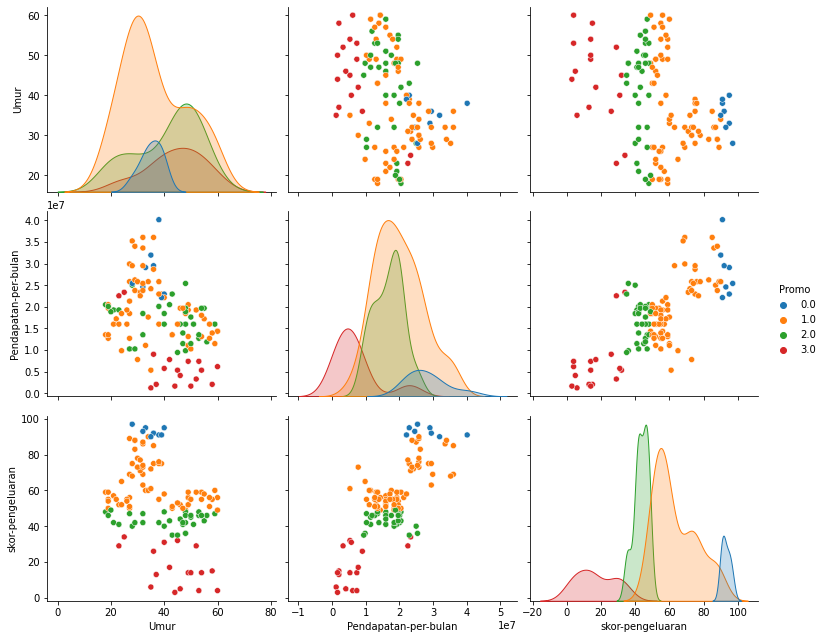

In [ ]:
sns.pairplot(data = data_no_outlier.drop(columns = "ID"), hue = 'Promo', height = 3, aspect = 1.2 )
plt.show()

Interpretasi : Terlihat bahwa orang yang memiliki gaji yang cenderung kecil memiliki skor pengeluaran yang kecil hal ini dikarenakan mereka yang gajinya cenderung kecil sering menggunakan promo, tetapi orang yang memiliki gaji yang cenderung besar memiliki skor pengeluaran yang besar hal ini dikarenakan mereka yang gajinya cenderung besar jarang atay tidak pernah menggunakan promo.

### **K-Means**

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
X = data_no_outlier[['Umur','Pendapatan-per-bulan','skor-pengeluaran']].values
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

KOMENTAR: Alasan pemilihan variabel?

In [ ]:
k_clusters = np.arange(2,15)
inertia_ = []
silhouette_ = []
for k in k_clusters:
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(X_scaled)
    labels_kmeans = kmeans.labels_
    inertia_val = kmeans.inertia_
    silhouette_val = silhouette_score(X_scaled, labels_kmeans)
    inertia_.append(inertia_val)
    silhouette_.append(silhouette_val)

Elbow's Method Plot :


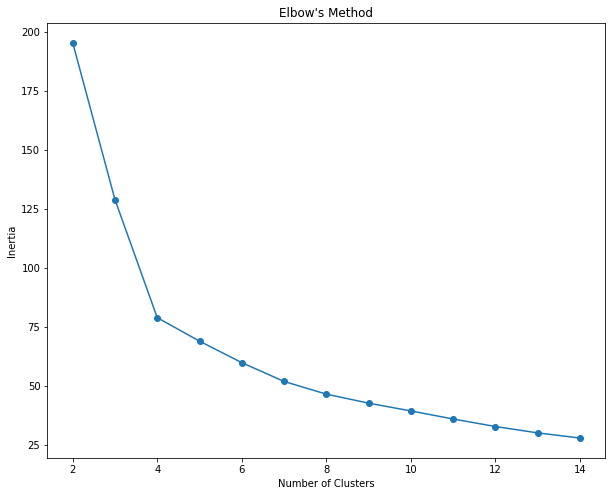

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(k_clusters, inertia_, marker = 'o')
ax.set_title("Elbow's Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Inertia")
print("="*50)
print("Elbow's Method Plot :")
print("="*50)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42).fit(X_scaled)
labels_kmeans = kmeans.labels_

KOMENTAR: Kenapa pilih 4 cluster?

In [ ]:
data_copy_kmeans= data_no_outlier.copy()
data_copy_kmeans['Label'] = labels_kmeans
data_copy_kmeans.loc[:,'Label'] = data_copy_kmeans.loc[:,'Label'].astype('category')

In [ ]:
fig = px.scatter_3d(data_copy_kmeans, x = 'Umur', y = 'Pendapatan-per-bulan', z = 'skor-pengeluaran', color = 'Label')
fig.update_layout( title={ 'text':"Clustering Output From KMeans (n_cluster = 4)", 'y':0.9, 'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                  font = {'size' : 10},
                  autosize=False,width=650, height=650, 
                  margin=dict( l=50, r=50, b=100, t=100, pad=4), paper_bgcolor="LightSteelBlue")
fig.show()

Dari gambar di atas, customer di segmentasi menjadi 4 cluster:
1. Cluster nol, yaitu berada pada umur 20-40 tahun , skor pengeluaran 60-100, dan pendapatan per-bulan sekitar Rp 20-40 juta
2. Cluster satu, yaitu berada pada umur 30-60 tahun, skor pengeluaran 30-60, dan pendapatan per-bulan sekitar Rp 10-25 juta
3. Cluster dua, yaitu berada pada umur 30-60 tahun, skor pengeluran 0-40, dan pendapatan per-bulan sekitar Rp 0-10 juta
4. Cluster tiga, yaitu berada pada umur 0-35 tahun, skor pengeluaran 30-100, dan pendapatan per-bulan sekitar Rp 0-25 juta




# A. Asumsi.
Kita asumsikan bahwa topologi dari data berbentuk sperichal karena algoritma K-Means mengasumsikan data berbentuk sperichal.

# B. Deskripsi.
Untuk melakukan clustering dengan metode K-Means, kami hanya menggunakan variabel numeric sebagai feauture yang digunakan. Mengapa? karena algoritma K-Means menggunakan rumus jarak untuk mengukur jarak antar point data yang dimana jarak tersebut digunakan untuk menentukan kluster. jarak ini akan hanya bisa dipakai untuk data bertipe numerik saja. Apabila data bertipe kategorik dimasukan, terdapat kesalahan pada jarak yang diukur karena tidak adanya arti seberapa jauh antar data point dengan nilai kategorik yang berbeda (hal ini berlaku juga apabila menggunakan one-hot encoding, jarak antar beda level kategori adalah 1 yang dimana hal tersebut tidak masuk akal. Contoh sederhananya adalah jarak antar Perempuan dan Laki-Laki adalah 1).

# C. Alternatif.
Terdapat beberapa alternatif dalam hal clustering dengan data yang memiliki tipe data kategorik atau mixed. Salah satunya adalah untuk data hanya kategorik saja dapat menggunakan K-Modes dan untuk data mixed (numeric dan kategorik) lebih baik untuk mengguanakn K-prototype yang diajukan oleh Zhexue Huang tahun 1998 dibandingkan dengan melakukan one hot encoding untuk tipe data kategorik. papers : https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.134.83&rep=rep1&type=pdf

In [ ]:
db = DBSCAN(eps=0.8, min_samples=6, metric='euclidean', n_jobs = -1)
db.fit(X_scaled)
labels = db.labels_
data_copy_dbscan= data_no_outlier.copy()
data_copy_dbscan['Label'] = labels
data_copy_dbscan.loc[:,'Label'] = data_copy_dbscan.loc[:,'Label'].astype('category')

In [ ]:
fig = px.scatter_3d(data_copy_dbscan, x = 'Umur', y = 'Pendapatan-per-bulan', z = 'skor-pengeluaran', color = 'Label')
fig.update_layout( title={ 'text':"Clustering Output FROM DBSCAN (eps = 0.8 & min_samples = 3)", 'y':0.9, 'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                  font = {'size' : 10},
                  autosize=False,width=650, height=650, 
                  margin=dict( l=50, r=50, b=100, t=100, pad=4), paper_bgcolor="LightSteelBlue")
fig.show()

### **Kesimpulan**
Dari hasil EDA,
1. Menambah pegawai di hari yang banyak pelanggan, seperti hari Senin, Sabtu, dan Minggu
2. Memberikan promo khusus di hari yang memiliki sedikit pelanggan  pada hari Selasa, Rabu, Kamis, dan Jum'at
3. Perusahaan dapat memproduksi rasa vanila lebih banyak dan untuk rasa coconut bisa diproduksi lebih sedikit agar tidak terlalu banyak stok dan pengeluaran.
4. Besar gaji berhubungan dengan skor pengeluaran, maka dapat disarankan lebih banyak memberikan promo di kota Tangerang karena gaji di kota tersebut lebih kecil.

Dari hasil cluster, 
1. Untuk pelanggan cluster nol diberikan keuntungan lebih seperti potongan harga, bonus pembelian buy 1 get 1, atau souvenir saat mencapai pembelian tertentu
2. Untuk pelanggan cluster satu memiliki pendapatan yang tinggi, untuk itu kita memberikan promosi seperti voucher untuk menarik perhatian pelanggan cluster satu sehingga meningkatkan skor pengeluaran pada pelanggan cluster tersebut

KOMENTAR: Good recommendation. Akan lebih baik lagi jika rekomendasi ini direfer ke output mana yang mendasarinya.